## Structual Model - Rong

we have some more data points now. Let:

$ M_t $ = set of measurements in treatment

$ M_c $ = set of measurements in control

$ M_i $ = the ith measurement in treatment

$ M_j $ = the jth measurement in control

$ Y_t $ = mean of treatment

$ Y_c $ = mean of control

$ \bar{Y} $ = expected mean of population

$ \varepsilon_{\Delta m} $ = standard deviation of the diff in means between 2 groups

$ b $ = treatment effect in units of the standard deviation of the population

$ c $ = gender (m - f) effect in units of the standard deviation of the population

$ G_t $ = % of males in the treatment

$ G_c $ = % of males in the control

$ n_t $ = # of measurements in the treatment

$ n_c $ = # of measurements in the control

$ \varepsilon_1, \varepsilon_2, \varepsilon $ = normal distributions, representing error terms

In order to scale the differences in means to compare across studies, we want to measure the difference in standard deviations of the underlying measure.

we are given the following values in the data:

$ Var(M_t) = \dfrac{\Sigma{(M_i - Y_t})^2}{n_t} $

$ Var(M_c) = \dfrac{\Sigma{(M_j - Y_c})^2}{n_c} $

and both $ n_t, n_c $

We also make the assumption that $ E(Y_t) = E(Y_c) = \bar{Y}$

Then if follows that:

$$ E(Var(M_t \cup M_c)) = \dfrac{\Sigma{(M_i - \bar{Y})}^2 + \Sigma{(M_j - \bar{Y})}^2}{n_t + n_c} $$

$$ = \dfrac{\Sigma{(M_i - Y_t)}^2 + \Sigma{(M_j - Y_c)}^2}{n_t + n_c} $$

$$ = \dfrac{n_t Var(M_t) + n_c Var(M_c)}{n_t + n_c} $$

Let denote this with $ Var(\cup) $ 

and the standard deviation with $ \sigma_{\cup} = \sqrt{Var(\cup)}$

If we measure the distance in units of std of the union $ \sigma_{\cup} $ then our structural model becomes:


## Let's start from scratch

we posit the data generating process


$$Y_i = scale * (\alpha + b * Treatment + c * Gender + \varepsilon_i)$$

with

$ b \sim N(0, \sigma_b) $

$ c \sim N(0, \sigma_c) $

$ \varepsilon_i \sim N(0, \sigma_e)$

This implies that

$$Y_t - Y_c = scale * (b + c * (G_t - G_c) + \Delta \varepsilon)$$

with 

$$\Delta \varepsilon \sim \mathcal N\left(0, \sqrt{\frac{\sigma_e^2}{N_t} + \frac{\sigma_e^2}{N_c}}\right)$$ 


Note that

$Var(Y_i | t) = scale^2 \sigma_e^2$

$Var(Y_i | c) = scale^2 \sigma_e^2$

$\sigma_U = scale * \sigma_e$

Hence we have that

$$effect \equiv \frac{Y_t - Y_c}{\sigma_U} = \hat b + \hat c * (G_t - G_c) + \hat \Delta \varepsilon$$

with 

$ \hat b \sim N(0, \hat \sigma_b) $

$ \hat c \sim N(0, \hat \sigma_c) $

$$\Delta \varepsilon \sim \mathcal N\left(0, \sqrt{\frac{1}{N_t} + \frac{1}{N_c}}\right)$$ 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import itertools
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_pickle('effect_imbal_enhanced.p')
print(len(data))
data = data[data['imbal'] < 0.4]
data.shape

2039


(2030, 16)

In [3]:
data.head()

,g1m,g1f,g2m,g2f,g1_mean,g2_mean,num_parts1,num_parts2,num_measures1,num_measures2,g1t,g2t,g1_sd_sample,g2_sd_sample,imbal,effect
NCT00114127,6.0,7.0,11.0,4.0,67.900,53.7000,13,15,13,15,13.0,15.0,27.402190,30.596568,0.271795,0.139906
NCT00180479,469.0,200.0,218.0,114.0,0.140,0.2800,301,134,301,134,669.0,332.0,0.410000,0.480000,0.044420,0.019672
NCT00405275,101.0,77.0,89.0,85.0,-2.120,-2.2900,154,155,154,155,178.0,174.0,1.280000,1.300000,0.055921,0.010684
NCT00446654,8.0,12.0,6.0,12.0,-0.010,0.0800,21,21,21,21,20.0,18.0,0.210000,0.250000,0.066667,0.091983
NCT00728754,15.0,14.0,17.0,15.0,-0.744,-0.8445,24,28,65,68,29.0,32.0,1.516511,1.186630,0.014009,0.008200


Column Definitions
Note: the group number betwen baseline measurements and outcome measurements are not necessarily consistent (upon investigation perhaps 10% of them have switched orders)

- Columns from Baseline Measurements
    - g1f: # females in group 1
    - g1m: # males in group 1
    - g1t: g1f + g1m
    - g2f: # females in group 2
    - g2m: # males in group 2
    - g2t: g2f + g2m
    - imbal: np.abs(g1m / g1t - g2m / g2t)
    
- Columns from Outcome Measurements
    - g1_mean: reported mean in group 1
    - g2_mean: reported mean in group 2
    - num_parts1: # participants in group 1
    - num_parts2: # participants in group 2
    - num_measures1: # of measurements taken in group 1 (for example if each eye was measured)
    - num_measures2: # of measurements taken in group 2 (for example if each eye was measured)
    - g1_sd_sample: standard dev of mesurements in group 1
    - g2_sd_sample standard dev of mesurements in group 2
    - effect: normalized diff in means as described above

## Distributional Plots

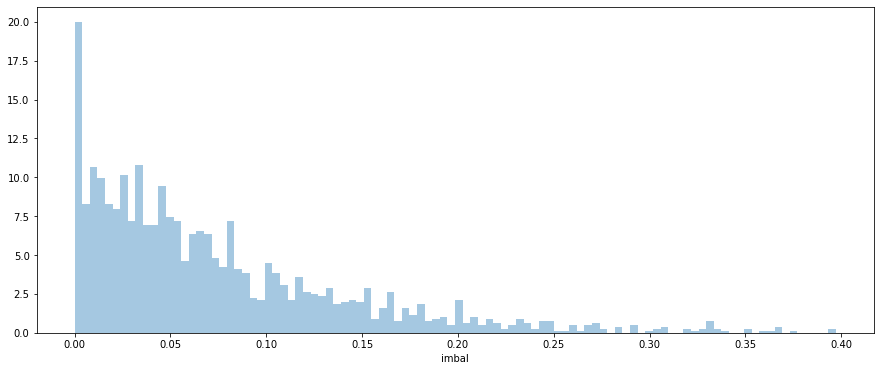

In [4]:
plt.figure(figsize=(15, 6))
sns.distplot(data['imbal'], kde=False, norm_hist=True, bins=100)
plt.show()

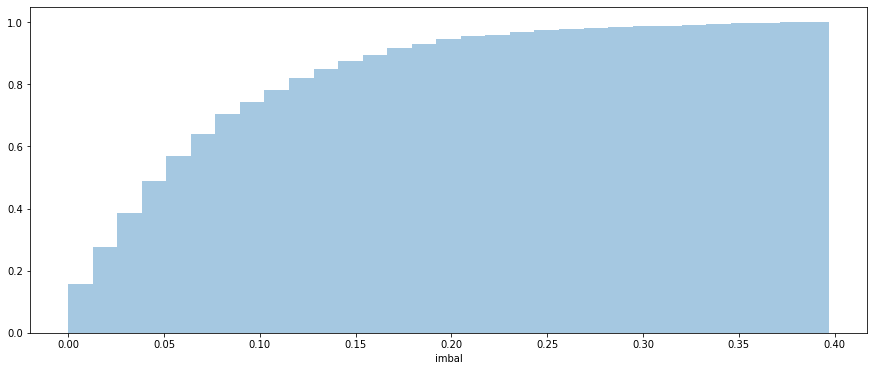

In [5]:
plt.figure(figsize=(15, 6))
sns.distplot(data['imbal'], kde=False, hist_kws={'cumulative': True}, norm_hist=True)
plt.show()

## Method for bootstrapping studies

In [40]:
def bootstrap(df, n, seed=1):
    """ samples with replacement n times from df's rows, returns the bootstrapped data """
    idx = df.index
    if seed is None:
        np.random.seed()
    else:
        np.random.seed(seed)
    sampled_idx = np.random.choice(idx, n, replace=True)
    return df.loc[sampled_idx]

In [7]:
%timeit bootstrap(data, 10000)

2.28 ms ± 17 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## GMM 1: Solve for the % blocked studies that generates the above CDF

In [8]:
# parameter for the points where we want to evaluate the CDF
vec_points = np.arange(0, 0.400001, 0.01)
vec_points

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])

In [9]:
len(vec_points)

41

In [41]:
def get_cdf_vec(s_data, vec_points):
    """ evaluates the cdf of s_data at vec_points"""
    all_cdf_points = []
    num_all = len(s_data)
    for cur_imbal in vec_points:
        cur_num = len(s_data[s_data <= cur_imbal])
        all_cdf_points.append(cur_num / num_all)
    return np.array(all_cdf_points)

def l1_dist(target_cdf, result_cdf):
    """ L1 distance between 2 CDF vectors """
    return np.linalg.norm(target_cdf - result_cdf, ord=1)

In [11]:
# our target CDF from existing imbalance data
target_cdf = get_cdf_vec(data['imbal'], vec_points)
target_cdf

array([0.05088933, 0.13438735, 0.22875494, 0.31422925, 0.4041502 ,
       0.48517787, 0.54397233, 0.6027668 , 0.6576087 , 0.70503953,
       0.73666008, 0.77173913, 0.79990119, 0.82559289, 0.84683794,
       0.86709486, 0.88685771, 0.90316206, 0.91600791, 0.92835968,
       0.94120553, 0.94911067, 0.95701581, 0.96047431, 0.96689723,
       0.97233202, 0.97529644, 0.97875494, 0.98221344, 0.98369565,
       0.98567194, 0.98863636, 0.98913043, 0.99110672, 0.99505929,
       0.99604743, 0.9965415 , 0.99851779, 0.99901186, 0.99901186,
       1.        ])

## Original Method: Using a fixed number of people in each experiment to generate the imbalance CDF

In [42]:
def generate_result_cdf_method_1(vec_points,
                                share_blocked_studies=0.,
                                seed=1,
                                n=50,
                                portion_men=0.5,
                                num_exp=2000):
    """ generate CDF of imbalance randomly """
    num_men = int(portion_men * n)
    if seed is None:
        np.random.seed()
    else:
        np.random.seed(seed)
    draw_men = np.random.randint(0, 2, size=(num_exp, num_men))
    num_men_treated = np.sum(draw_men, axis=1)
    num_men_control = num_men - num_men_treated
    share_men_treatment = num_men_treated / (n / 2.)
    share_men_control = num_men_control / (n / 2.)
    signed_imbalance = share_men_treatment - share_men_control
    
    # overriding blocked studies to 0
    signed_imbalance[:int(share_blocked_studies * num_exp)] = 0
    abs_imbalance = np.abs(signed_imbalance)
    return get_cdf_vec(abs_imbalance, vec_points)

In [43]:
def generate_l1_path(vec_points, n=50, seed=1):
    """ generate the function of L1 distance as a function of % blocked """
    res_dict = {}
    for pct_block in np.linspace(0, 1., 100):
        result_cdf = generate_result_cdf_method_1(vec_points, pct_block, seed=seed, n=n)
        res_dict[pct_block] = {
            'score': l1_dist(target_cdf, result_cdf)
        }
    df_res = pd.DataFrame(res_dict).T
    df_res.index.name = 'share_blocked'
    return df_res

In [14]:
try_n = [50, 200, 500, 1000]
res_dfs = []
for n in try_n:
    num_seeds = 20
    all_dfs = []
    for seed in tqdm(range(num_seeds)):
        df_res = generate_l1_path(vec_points, n=n, seed=seed)
        all_dfs.append(df_res)
    res_dfs.append(all_dfs)

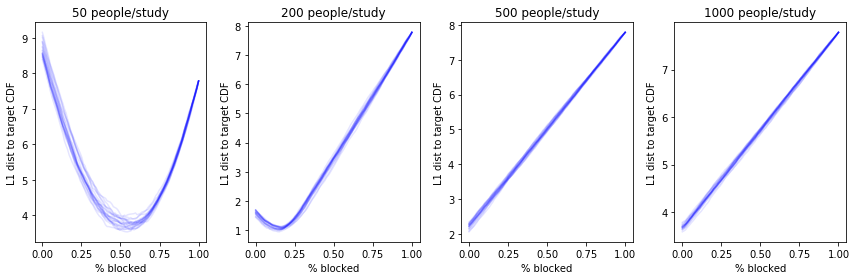

In [15]:
num_plots = len(res_dfs)
fig, axs = plt.subplots(1, num_plots, figsize=(12, 4))

for i, all_dfs in enumerate(res_dfs):
    for df in all_dfs:
        axs[i].plot(df['score'], alpha=0.1, color='b')
    axs[i].set_xlabel('% blocked')
    axs[i].set_ylabel('L1 dist to target CDF')
    axs[i].set_title('%s people/study' % try_n[i])

    plt.tight_layout()
plt.show()

Notes: Under this method, the "% blocked" value that minimizes the CDF distance changes as the number of people increases - why is this true?

#### let's plot a couple of examples with 50 and 500 people

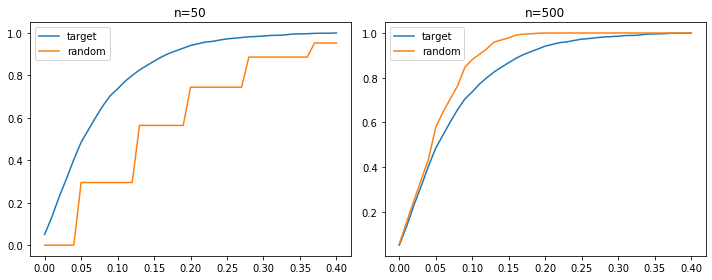

In [16]:
result_cdf1 = generate_result_cdf_method_1(vec_points, 0.0, n=50, seed=1)
result_cdf2 = generate_result_cdf_method_1(vec_points, 0.0, n=500, seed=1)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(vec_points, target_cdf, label='target')
axs[0].plot(vec_points, result_cdf1, label='random')
axs[0].set_title('n=50')
axs[0].legend()

axs[1].plot(vec_points, target_cdf, label='target')
axs[1].plot(vec_points, result_cdf2, label='random')
axs[1].set_title('n=500')
axs[1].legend()

plt.tight_layout()
plt.show()

Notes: As the number of people increases, the CDF naturally moves up and above the target CDF. As a result, once the generated CDF is already above the target, we no long need to bump the CDF by adding to the "% blocked" parameter (which serves to manually move the CDF higher)

## Method 2, bootstrap using the actual pool of pop sizes

In [44]:
num_exp = 2000
share_blocked_studies = 0.

def bootstrapped_cdf(vec_points,
                     data, 
                     num_exp=2000,
                     share_blocked_studies=0.,
                     seed=1,
                     use_actual_data=False):
    if use_actual_data:
        # override some values
        df_bt = data.copy()
        num_exp = len(data)
    else:
        df_bt = bootstrap(data, num_exp)
    
    if seed is None:
        np.random.seed()
    else:
        np.random.seed(seed)
        
    gen_imbal = []
    gen_m_g1 = []
    gen_m_g2 = []
    
    for i in range(len(df_bt)):
        """ we randomly assign males and females to the groups based on the target sizes of the actual groups """
        idx = df_bt.index.values[i]
        tot_m = int(df_bt['g1m'].values[i] + df_bt['g2m'].values[i])  # actual num males
        tot_g1 = int(df_bt['g1t'].values[i])
        tot_g2 = int(df_bt['g2t'].values[i])
        tot = tot_g1 + tot_g2
        tot_f = tot - tot_m
        
        pr_g1 = tot_g1 / tot  # pr of being assigned to group 1
        m_in_g1 = (np.random.uniform(0, 1, tot_m) < pr_g1).sum()  # random assigning each male
        f_in_g1 = (np.random.uniform(0, 1, tot_f) < pr_g1).sum()  # random assigning each female
        
        m_in_g2 = tot_m - m_in_g1
        f_in_g2 = tot_f - f_in_g1
        
        new_tot_g1 = m_in_g1 + f_in_g1
        new_tot_g2 = m_in_g2 + f_in_g2
        
        if new_tot_g1 == 0:
            pct_m_g1 = 0
        else:
            pct_m_g1 = m_in_g1 / new_tot_g1
            
        if new_tot_g2 == 0:
            pct_m_g2 = 0
        else:
            pct_m_g2 = m_in_g2 / new_tot_g2
        
        signed_imbalance = pct_m_g1 - pct_m_g2
        abs_imbalance = np.abs(signed_imbalance)
        
        gen_imbal.append(abs_imbalance)
        gen_m_g1.append(m_in_g1)
        gen_m_g2.append(m_in_g2)
    
    # set some of the imbalances to 0 due to blocked assumption
    blocked_imbal = np.array(gen_imbal)
    blocked_imbal[:int(share_blocked_studies * num_exp)] = 0.
    
    df_bt['gen_imbal'] = blocked_imbal
    df_bt['gen_m_g1'] = gen_m_g1
    df_bt['gen_m_g2'] = gen_m_g2
    
    result_cdf = get_cdf_vec(df_bt['gen_imbal'], vec_points)
    return result_cdf        


def generate_signed_imbal_on_data(df_bt, share_blocked_studies=0.,seed=1):
    """ generates the vector of imbalances for each row of the data provided """
    if seed is None:
        np.random.seed()
    else:
        np.random.seed(seed)
        
    gen_imbal = []
    gen_m_g1 = []
    gen_m_g2 = []
    num_exp = len(df_bt)
    
    for i in range(len(df_bt)):
        """ we randomly assign males and females to the groups based on the target sizes of the actual groups """
        idx = df_bt.index.values[i]
        tot_m = int(df_bt['g1m'].values[i] + df_bt['g2m'].values[i])  # actual num males
        tot_g1 = int(df_bt['g1t'].values[i])
        tot_g2 = int(df_bt['g2t'].values[i])
        tot = tot_g1 + tot_g2
        tot_f = tot - tot_m
        
        pr_g1 = tot_g1 / tot  # pr of being assigned to group 1
        m_in_g1 = (np.random.uniform(0, 1, tot_m) < pr_g1).sum()  # random assigning each male
        f_in_g1 = (np.random.uniform(0, 1, tot_f) < pr_g1).sum()  # random assigning each female
        
        m_in_g2 = tot_m - m_in_g1
        f_in_g2 = tot_f - f_in_g1
        
        new_tot_g1 = m_in_g1 + f_in_g1
        new_tot_g2 = m_in_g2 + f_in_g2
        
        if new_tot_g1 == 0:
            pct_m_g1 = 0
        else:
            pct_m_g1 = m_in_g1 / new_tot_g1
            
        if new_tot_g2 == 0:
            pct_m_g2 = 0
        else:
            pct_m_g2 = m_in_g2 / new_tot_g2
        
        signed_imbalance = pct_m_g1 - pct_m_g2
        
        gen_imbal.append(signed_imbalance)
        gen_m_g1.append(m_in_g1)
        gen_m_g2.append(m_in_g2)
    
    # set some of the imbalances to 0 due to blocked assumption
    blocked_imbal = np.array(gen_imbal)
    blocked_imbal[:int(share_blocked_studies * num_exp)] = 0.
    
    return blocked_imbal

In [18]:
# testing
result_cdf = bootstrapped_cdf(vec_points, data, num_exp=2000, share_blocked_studies=0.)
result_cdf

array([0.0135, 0.105 , 0.193 , 0.2835, 0.3605, 0.4295, 0.5025, 0.5575,
       0.6085, 0.6615, 0.7005, 0.7275, 0.753 , 0.7715, 0.7965, 0.823 ,
       0.843 , 0.863 , 0.88  , 0.8935, 0.902 , 0.9085, 0.918 , 0.9305,
       0.943 , 0.95  , 0.9535, 0.9575, 0.966 , 0.9705, 0.975 , 0.9785,
       0.982 , 0.9835, 0.986 , 0.9875, 0.989 , 0.9905, 0.9925, 0.993 ,
       0.9935])

In [45]:
def generate_l1_path_bootstrap(vec_points, data, n=50, seed=1, use_actual_data=False):
    """ generate the function of L1 distance as a function of % blocked """
    res_dict = {}
    for pct_block in np.linspace(0, 1., 11):
        result_cdf = bootstrapped_cdf(vec_points, 
                                      data, 
                                      num_exp=n, 
                                      share_blocked_studies=pct_block, 
                                      seed=seed,
                                      use_actual_data=use_actual_data)
        res_dict[pct_block] = {
            'score': l1_dist(target_cdf, result_cdf)
        }
    df_res = pd.DataFrame(res_dict).T
    df_res.index.name = 'share_blocked'
    return df_res

In [49]:
try_n = [100, 500, 2500, 10000]
res_dfs = []
for n in try_n:
    num_seeds = 20
    all_dfs = []
    for seed in tqdm(range(num_seeds)):
        df_res = generate_l1_path_bootstrap(vec_points, n=n, seed=seed)
        all_dfs.append(df_res)
    res_dfs.append(all_dfs)

/home/rmfeng/miniconda3/envs/capstone/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars


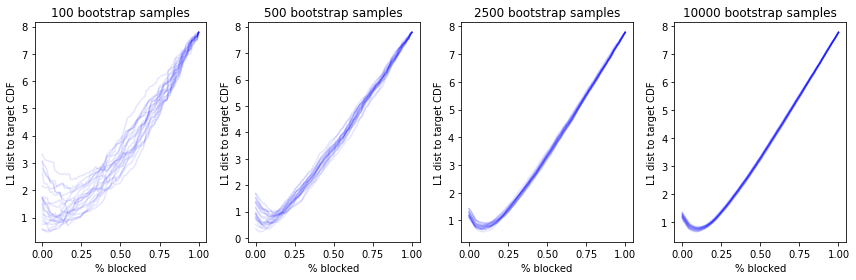

In [51]:
num_plots = len(res_dfs)
fig, axs = plt.subplots(1, num_plots, figsize=(12, 4))

for i, all_dfs in enumerate(res_dfs):
    for df in all_dfs:
        axs[i].plot(df['score'], alpha=0.1, color='b')
    axs[i].set_xlabel('% blocked')
    axs[i].set_ylabel('L1 dist to target CDF')
    axs[i].set_title('%s bootstrap samples' % try_n[i])

    plt.tight_layout()
plt.show()

In [52]:
ex_res = res_dfs[3][0]
ex_res[:.2]

,score
share_blocked,
0.000000,1.148221
0.010101,1.054421
0.020202,0.968821
0.030303,0.883421
0.040404,0.804468
0.050505,0.762458
0.060606,0.732099
0.070707,0.708099
0.080808,0.688599


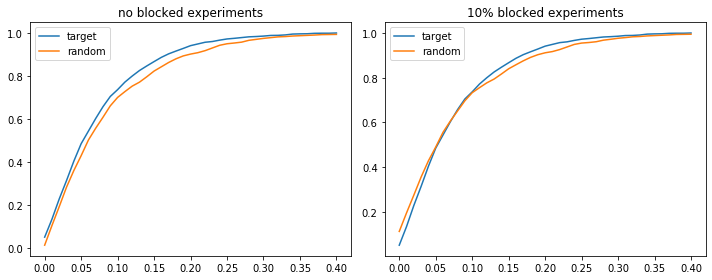

In [53]:
result_cdf1 = bootstrapped_cdf(vec_points, num_exp=2000, share_blocked_studies=0.)
result_cdf2 = bootstrapped_cdf(vec_points, num_exp=2000, share_blocked_studies=0.1)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(vec_points, target_cdf, label='target')
axs[0].plot(vec_points, result_cdf1, label='random')
axs[0].set_title('no blocked experiments')
axs[0].legend()

axs[1].plot(vec_points, target_cdf, label='target')
axs[1].plot(vec_points, result_cdf2, label='random')
axs[1].set_title('10% blocked experiments')
axs[1].legend()

plt.tight_layout()
plt.show()

## Estimating the Standard Error of the '% Blocked' Estimator

- our sample has roughly 2000 studies

In [183]:
all_min_ests = []
for i in tqdm(range(100)):
    df_res = generate_l1_path_bootstrap(vec_points, 
                                        data, 
                                        seed=None, 
                                        use_actual_data=True)
    
    cur_min = df_res[['score']].idxmin()['score']
    all_min_ests.append(cur_min)

In [188]:
mean_est = np.mean(all_min_ests)
std_est = np.std(all_min_ests)

print("Estimated %% blocked is %.1f%% with a standard error of %.1f%%" % (mean_est * 100, std_est * 100))

Estimated % blocked is 10.7% with a standard error of 2.9%


## Scatter of imbal vs effect

In [13]:
data['effect'].describe(np.arange(0,1,0.1))

count    2028.000000
mean        0.145993
std         1.205262
min         0.000000
0%          0.000000
10%         0.005787
20%         0.012415
30%         0.019973
40%         0.031136
50%         0.047318
60%         0.068286
70%         0.100308
80%         0.148774
90%         0.254436
max        51.044759
Name: effect, dtype: float64

In [18]:
data['effect'].describe(np.arange(0, 1, 0.05))

count    2028.000000
mean        0.145993
std         1.205262
min         0.000000
0%          0.000000
5%          0.001998
10%         0.005787
15%         0.008805
20%         0.012415
25%         0.015975
30%         0.019973
35%         0.025701
40%         0.031136
45%         0.038817
50%         0.047318
55%         0.057434
60%         0.068286
65%         0.083290
70%         0.100308
75%         0.121995
80%         0.148774
85%         0.184368
90%         0.254436
95%         0.399090
max        51.044759
Name: effect, dtype: float64

In [19]:
# throw out values more than 95th percentile
data = data[data['effect'] < 0.4]

In [20]:
data['pval'] = (1 - st.norm.cdf(data['effect']))

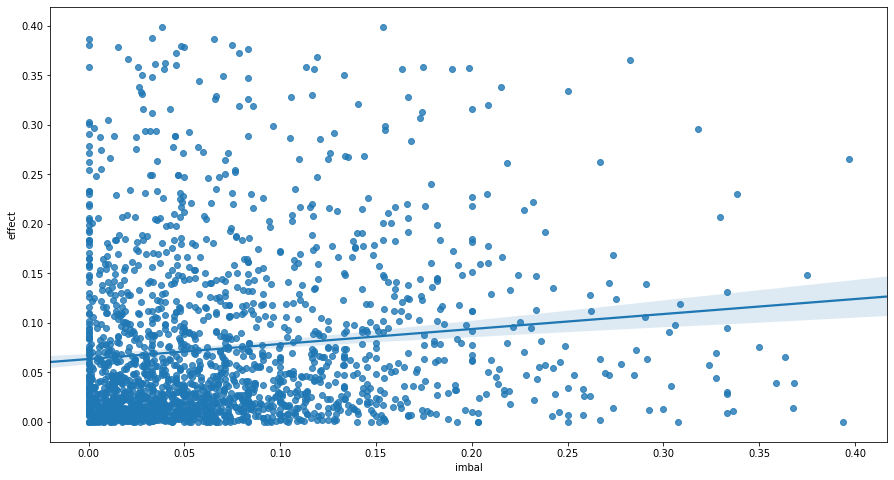

In [21]:
plt.figure(figsize=(15, 8))
sns.regplot('imbal', 'effect', data)
plt.show()

## Quantile Reg

In [22]:
mod = smf.quantreg('effect ~ imbal', data)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                 effect   Pseudo R-squared:              0.01538
Model:                       QuantReg   Bandwidth:                     0.02570
Method:                 Least Squares   Sparsity:                       0.1379
Date:                Sat, 01 Feb 2020   No. Observations:                 1927
Time:                        09:00:20   Df Residuals:                     1925
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0302      0.002     13.229      0.000       0.026       0.035
imbal          0.1802      0.023      7.765      0.000       0.135       0.226


In [23]:
param_results =[]
for q in np.linspace(0.02, .98, num=50):
    res = mod.fit(q=q)
    param_results.append(
        [q, res.params['imbal'], res.bse['imbal'], res.pvalues['imbal']])
param_results = pd.DataFrame(param_results, columns=['q', 'coeff', 'se', 'pvalue'])
param_results = param_results.set_index('q')
param_results.head()

,coeff,se,pvalue
q,,,
0.020000,-0.000282,0.008152,0.972409
0.039592,0.004581,0.008563,0.592731
0.059184,0.020217,0.008765,0.021181
0.078776,0.025822,0.010050,0.010263
0.098367,0.028078,0.010601,0.008146


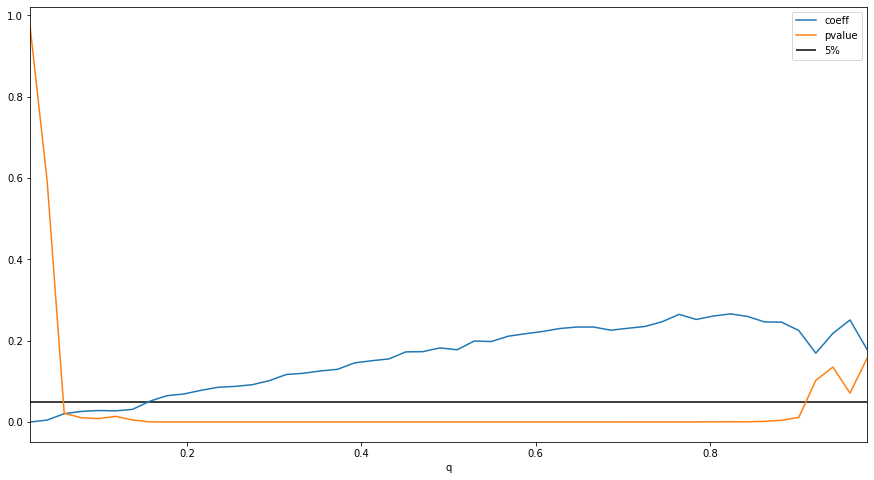

In [24]:
param_results[['coeff', 'pvalue']].plot(figsize=(15, 8))
plt.hlines(.05, 0, 1)
plt.legend(['coeff', 'pvalue', '5%'])
plt.show()

## How do we bootstrap this?

- bootstrap the studies
- generate an imbalance for each study using the "% block" parameter
- generate b and c, and e randomly
- generate the effect measure
- calc the coef parameter vector (on different quantiles)

### Target

In [46]:
q_vec = np.linspace(0.2, 0.9, 8)
q_vec

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [47]:
# Hyperparameters for lowering the effect of the pval significance of the quantile regression vector
P_VAL_DIVISOR = 10  
P_VAL_SIG_LEVEL = 0.05

In [48]:
def calc_qreg_vector(y_col, x_col, data):
    mod = smf.quantreg('%s ~ %s' % (y_col, x_col), data)
    all_coefs = []
    all_ps = []
    for q in q_vec:
        res = mod.fit(q=q)
        all_coefs.append(res.params[x_col])
        all_ps.append(res.pvalues[x_col])
    np_coefs = np.array(all_coefs)
    np_ps = (np.array(all_ps) < P_VAL_SIG_LEVEL).astype(int) / P_VAL_DIVISOR
    return np_coefs
    # return np.append(np_coefs, np_ps)

In [49]:
target_qreg_vec = calc_qreg_vector('effect', 'imbal', data)
target_qreg_vec

array([0.06940005, 0.10139188, 0.14956359, 0.18016379, 0.23111278,
       0.22192618, 0.26547422, 0.22901371])

### Functions to bootstrap

In [50]:
def bootstrap_qreg(data,
                   sigma_b,
                   sigma_c,
                   sigma_e,
                   num_exp=1000, 
                   pct_block=0.107, 
                   seed=1,
                   use_actual_data=False):
    if use_actual_data:
        df_bt = data.copy()
        num_exp = len(data)
    else:
        df_bt = bootstrap(data, num_exp)
    df_bt['signed_imbal'] = generate_signed_imbal_on_data(df_bt, 
                                                          share_blocked_studies=pct_block,
                                                          seed=seed)
    df_bt['gen_imbal'] = np.abs(df_bt['signed_imbal'])
    df_bt['b'] = np.random.normal(0, sigma_b, num_exp)
    df_bt['c'] = np.random.normal(0, sigma_c, num_exp)
    df_bt['e'] = np.random.normal(0, sigma_e, num_exp)
    df_bt['gen_effect'] = np.abs(df_bt['b'] + df_bt['c'] * df_bt['gen_imbal'] + df_bt['e'])
    df_bt['gen_pval'] = (1 - st.norm.cdf(df_bt['gen_effect']))
    result_qreg_vec = calc_qreg_vector('gen_pval', 'gen_imbal', df_bt)
    return result_qreg_vec


def plot_qreg_diffs(tvec, rvec, qvec):
    plt.figure(figsize=(6, 6))
    plt.plot(qvec, tvec[:len(qvec)], label='target')
    plt.plot(qvec, rvec[:len(qvec)], label='generated')
    plt.title("Compare Coeffcients")
    plt.ylabel("QReg Coef")
    plt.xlabel("quantile")
    plt.show()

## repeating sims for a "max likelihood" est

In [67]:
import warnings
warnings.filterwarnings('ignore')

def eval_fn(params, reps=100):
    all_ests = []
    b, c, e = params
    for i in range(reps):
        result_qreg_vec = bootstrap_qreg(data,
                                         b,
                                         c,
                                         e, 
                                         seed=None)
        cur_l1 = l1_dist(target_qreg_vec, result_qreg_vec)
        all_ests.append(cur_l1)
    return np.mean(all_ests), np.std(all_ests), np.min(all_ests)

## Grid Search

In [52]:
b_grid = np.linspace(2, 3, 5)
c_grid = np.linspace(0.5, 1.5, 5)
e_grid = np.linspace(0.01, 0.05, 5)
all_params = {
    'b': b_grid,
    'c': c_grid,
    'e': e_grid,
}

posterior_mass(b,c,e) = prior_mass(b,c,e) * density_of_target_moments_given(b,c,e)
                      = (1/grid_size) * bootstrapped_density_of_target_moments_given(b,c,e)
                      ~ (1/grid_size) * bootstrapped_KDE_of_target_moments_given(b,c,e)

posterior_prob(b,c,e) = posterior_mass(b,c,e)/sum_over_grid_points(posterior_mass(grid_point))


Proba(b,c,e| target moments) = Proba_prior(b,c,e) * Proba(target_moments | b,c,e) / 
    (\sum_{b', c', e'} Proba_prior(b',c',e') * Proba(target_moments | b',c',e'))


In [53]:
res_dict = {}
for params in tqdm(list(itertools.product(b_grid, c_grid, e_grid))):
    cur_l1, cur_std, cur_min = eval_fn(params)
    res_dict[params] = cur_l1
    
df_res = pd.DataFrame(res_dict, index=['l1_dist']).T
df_res.index.names = ['b', 'c', 'e']
df_res = df_res.reset_index()

## is the function smooth across dims?

In [54]:
def plot_cross_dim(dim1_grid, dim1_name, dim2_name, ax):
    for v in dim1_grid:
        sub_res = df_res[df_res[dim1_name] == v]
        ax.plot(sub_res.groupby(dim2_name)['l1_dist'].mean(), label='%s=%s' % (dim1_name, v))

    ax.set_ylabel('l1_dist')
    ax.set_xlabel(dim2_name)    
    ax.legend()
    ax.set_title('Average across 2 dimensions')

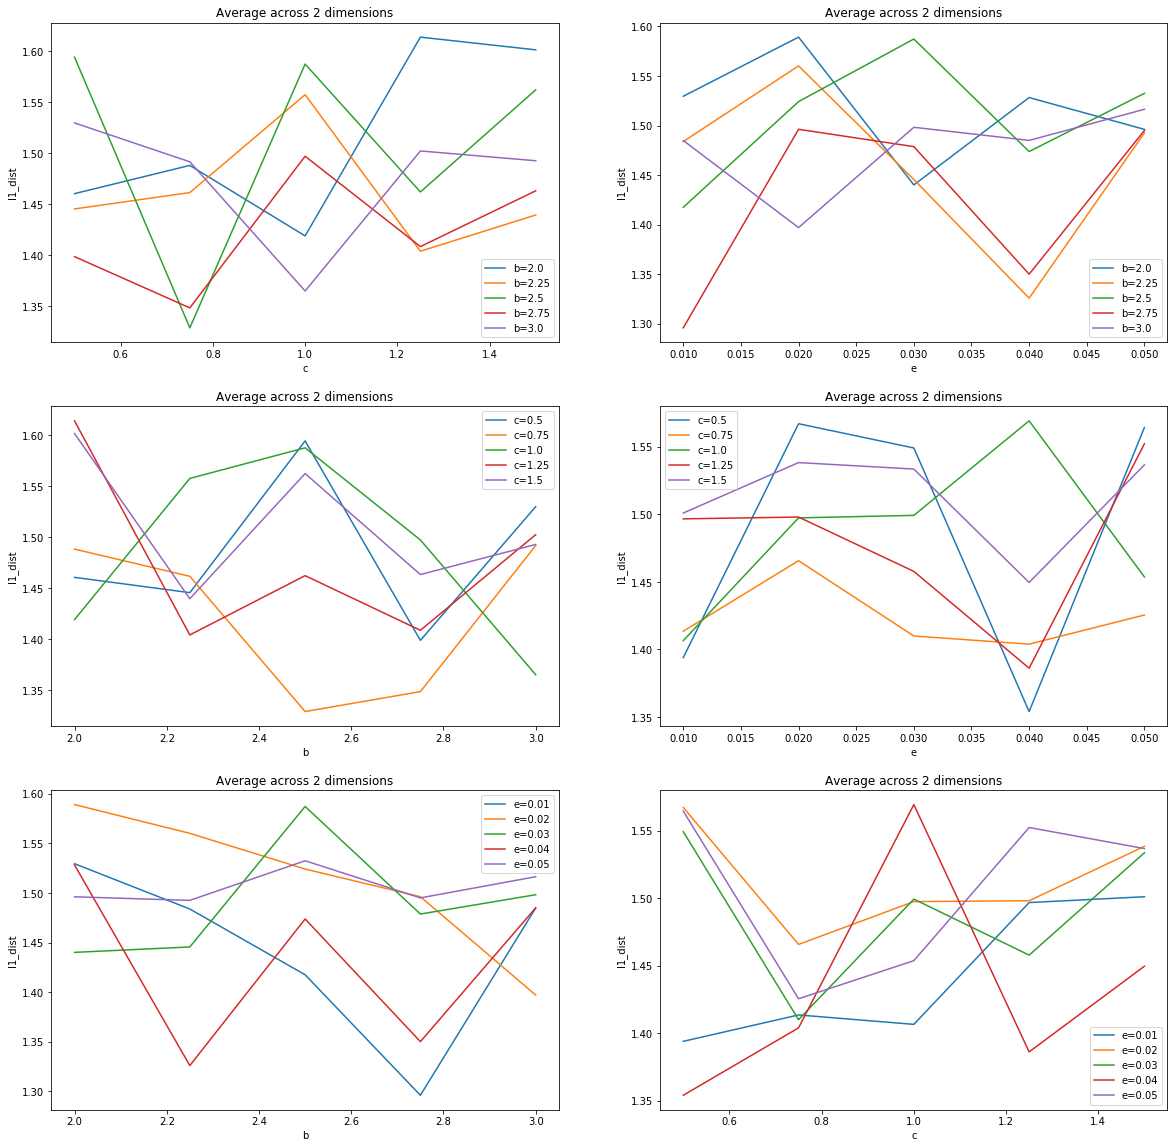

In [55]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
all_keys = all_params.keys()
i = 0
for p1, p2 in itertools.product(all_keys, all_keys):
    if p1 != p2:           
        j = i % 2
        k = i // 2
        ax = axs[(k, j)]
        plot_cross_dim(all_params[p1], p1, p2, ax)
        i += 1
plt.show()

Notes: 
- Looks like for both other dims, b has to be larger
- e has a sweet spot around 0.25?
- c is perhaps around 0.5

## Serial Grid Search

In [58]:
b_grid = np.linspace(2, 3, 5)
c_grid = np.linspace(0.5, 1.5, 5)
e_grid = np.linspace(0.01, 0.05, 5)
all_params = {
    'b': b_grid,
    'c': c_grid,
    'e': e_grid,
}

res_dict = {}
for params in tqdm(list(itertools.product(b_grid, c_grid, e_grid))):
    cur_l1, cur_std = eval_fn(params, reps=10)
    res_dict[(b, c, e)] = cur_l1
    
df_res = pd.DataFrame(res_dict, index=['l1_dist']).T
df_res.index.names = ['b', 'c', 'e']
df_res = df_res.reset_index()

## Parallel Grid Search

In [68]:
import multiprocessing as mp

In [69]:
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


In [70]:
%%time

b_grid = np.linspace(2, 3, 5)
c_grid = np.linspace(0.5, 1.5, 5)
e_grid = np.linspace(0.01, 0.05, 5)

used_cpus = mp.cpu_count() - 1
pool = mp.Pool(used_cpus) # let's save 1 processor for the OS

grid_params = []
for params in itertools.product(b_grid, c_grid, e_grid):
    grid_params.append(params)
    
print("Running %s grid points with %s CPUs" % (len(grid_params), used_cpus))
results = pool.map(eval_fn, grid_params)

pool.close()

Running 125 grid points with 3 CPUs
CPU times: user 877 ms, sys: 140 ms, total: 1.02 s
Wall time: 59min 10s


In [71]:
res_dict = dict(zip(grid_params, results))

In [72]:
res_dict

{(2.0, 0.5, 0.01): (1.5605692164732516,
  0.5200079452511183,
  0.5640621006765567),
 (2.0, 0.5, 0.02): (1.4617926073196457,
  0.5240499006229606,
  0.3180385599185255),
 (2.0, 0.5, 0.03): (1.4828374956666395,
  0.5691649799217486,
  0.3922426888421843),
 (2.0, 0.5, 0.04): (1.597649026589948,
  0.5566463277527512,
  0.40979884055497606),
 (2.0, 0.5, 0.05): (1.4373316699304706,
  0.5343421051483567,
  0.3666033985667435),
 (2.0, 0.75, 0.01): (1.4154993952820183,
  0.5380922832519646,
  0.5118090240348112),
 (2.0, 0.75, 0.02): (1.482592493123005,
  0.551744009495382,
  0.42819478237962344),
 (2.0, 0.75, 0.03): (1.4843059361752526,
  0.5134119966756366,
  0.3908654935282011),
 (2.0, 0.75, 0.04): (1.454539271732305, 0.55785355690609, 0.31613902345859796),
 (2.0, 0.75, 0.05): (1.4074190957095754,
  0.5480280270516523,
  0.3313640024482315),
 (2.0, 1.0, 0.01): (1.3239588535488587,
  0.5150184213433341,
  0.3948110615379418),
 (2.0, 1.0, 0.02): (1.552051382084066, 0.5558366928631785, 0.503182

In [73]:
min([x[2] for x in results])

0.27604228413372406

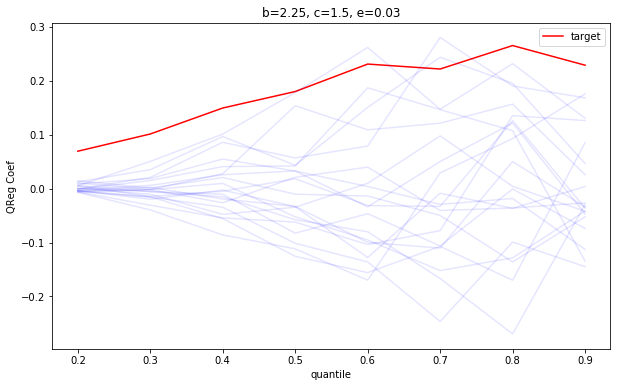

In [74]:
b = 2.25
c = 1.5
e = 0.03

plt.figure(figsize=(10, 6))
plt.plot(q_vec, target_qreg_vec, label='target', c='r')
for i in range(20):
    result_qreg_vec = bootstrap_qreg(data,
                                     b,
                                     c,
                                     e, 
                                     seed=None)
    
    plt.plot(q_vec, result_qreg_vec, alpha=0.1, c='b')
plt.title("b=%s, c=%s, e=%s" % (b, c, e))
plt.ylabel("QReg Coef")
plt.xlabel("quantile")
plt.legend()
plt.show()

## what if we just did numerical gradient descent now?

with our guesses of:
b = 2.8
c = 1.0
e = 0.01

In [561]:
params = 2.0, 1.0, 0.01
eval_fn(params, reps=100)

(1.2052536801089255, 0.45048658667491853)

In [563]:
alpha = 0.01
epsilon = 0.001

# start values
b, c, e = 2.0, 1.0, 0.01

for i in range(0, 100):
    params = b, c, e
    cur_obj = eval_fn(params, reps=100)
    print("after %s steps, obj = %s, b=%s, c=%s, e=%s" % (i, cur_obj, b, c, e))
    
    bp_params = b + epsilon, c, e
    cur_obj_bp, _ = eval_fn(bp_params, reps=100)
    bm_params = b - epsilon, c, e
    cur_obj_bm, _ = eval_fn(bm_params, reps=100)
    delta_b = (cur_obj_bp - cur_obj_bm) / (2 * epsilon)
    
    cp_params = b, c + epsilon, e
    cur_obj_cp, _ = eval_fn(cp_params, reps=100)
    cm_params = b, c - epsilon, e
    cur_obj_cm, _ = eval_fn(cm_params, reps=100)
    delta_c = (cur_obj_cp - cur_obj_cm) / (2 * epsilon)
    
    ep_params = b, c, e + epsilon
    cur_obj_ep, _ = eval_fn(ep_params, reps=100)
    em_params = b, c, e - epsilon
    cur_obj_em, _ = eval_fn(em_params, reps=100)
    delta_e = (cur_obj_ep - cur_obj_em) / (2 * epsilon)
    
    # step
    b = max(b - delta_b * alpha, epsilon)
    c = max(c - delta_c * alpha, epsilon)
    e = max(e - delta_e * alpha, epsilon)
    

after 0 steps, obj = (1.2704511905997438, 0.40224073192770055), b=2.0, c=1.0, e=0.01
after 1 steps, obj = (1.3623917369748724, 0.48163831022232656), b=2.114950322741383, c=1.6186556801893839, e=0.07480478238124032
after 2 steps, obj = (1.3029590790499546, 0.47504708878741125), b=1.78301870183087, c=1.8808929957416678, e=0.17118992801525734
after 3 steps, obj = (1.4427077219156672, 0.48374797902005645), b=1.3398898503079442, c=1.6257649474809224, e=0.04560832980160412
after 4 steps, obj = (2.1051536205430468, 0.48196374356792454), b=0.7364682206878985, c=2.017893027394008, e=0.24518541810978456


KeyboardInterrupt: 